In [11]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
rc('text', usetex=True)

In [12]:
def pd_read_dump(filepath):
    df = pd.read_csv(
        filepath, 
        sep="    ", comment="#",
        names = ["Particle ID", "Particle type", "Smoothing length", "Density", "Pressure", "Particle acceleration", "Particle velocity", "Particle position"],
        engine="python"
    )
    return df

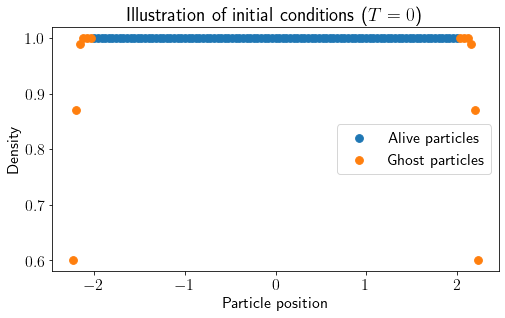

In [13]:
# Plot initial conditions

df_0 = pd_read_dump("../dumps/0.txt")

n_part = len(df_0)

df_alive = df_0[df_0["Particle type"] == "Alive"]
df_ghost = df_0[df_0["Particle type"] == "Ghost"]

# Initial condition plot showing off ghost particles
plt.figure(figsize=(8, 4.5))
plt.rc("font", size=16)

plt.scatter(df_alive["Particle position"], df_alive["Density"], label="Alive particles", s=60)
plt.scatter(df_ghost["Particle position"], df_ghost["Density"], label="Ghost particles", s=60)

plt.xlabel("Particle position")
plt.ylabel("Density")
plt.title("Illustration of initial conditions ($T=0$)")

plt.legend()
plt.show()

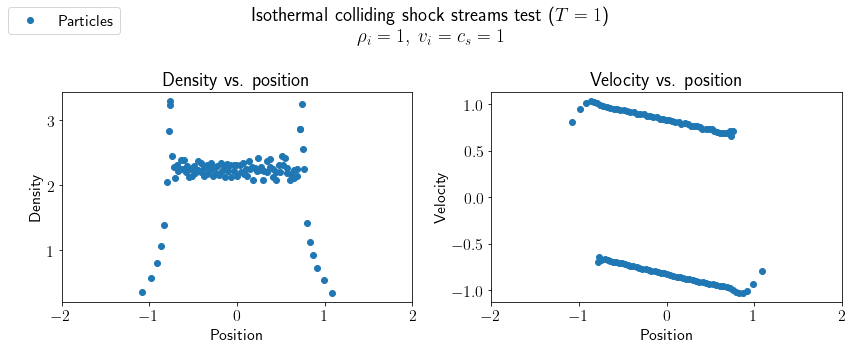

In [14]:
# Density plot at t = 1 for isothermal shock test
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df_1 = pd_read_dump(f"../dumps/200.txt")

ax[0].scatter(df_1["Particle position"], df_1["Density"], label="Particles", zorder=100)
#fig.set_title("T = 1 isothermal colliding streams / h = 0.3, T_step = 0.005")
ax[0].set_xlabel("Position")
ax[0].set_ylabel("Density")
ax[0].set_xlim(-2, 2)
ax[0].set_title("Density vs. position")

ax[1].scatter(df_1["Particle position"], df_1["Particle velocity"])
ax[1].set_xlabel("Position")
ax[1].set_ylabel("Velocity")
ax[1].set_xlim(-2, 2)
ax[1].set_title("Velocity vs. position")

fig.suptitle("Isothermal colliding shock streams test ($T=1$)\n$\\rho_i = 1,\;v_i = c_s = 1$")

fig.legend(loc='upper left')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Smoothing length vs. position at T = 1')

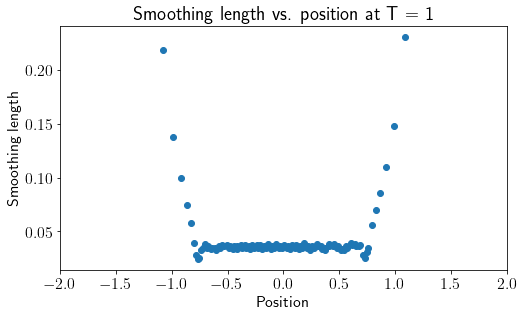

In [15]:
# Variable smoothing length plot
plt.figure(figsize=(8, 4.5))
df_1 = pd_read_dump(f"../dumps/200.txt")

plt.scatter(df_1["Particle position"], df_1["Smoothing length"])
plt.xlabel("Position")
plt.ylabel("Smoothing length")
plt.xlim(-2, 2)
plt.title("Smoothing length vs. position at T = 1")
